# Data Science Assignment

### Author: @Gurjeet Singh

## Part 0: Reading the data

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# reading excel file as dataframe
df=pd.read_excel("Fytlyff_DS_Interview.xlsx")
df.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033


In [3]:
# printing different columns names
print("The different columns are:")
for i in df.columns:
    print(i)

The different columns are:
Year
Month
Laptop/Desktop
Type_of_Customers?
Coming from
Place_in_India
Level 1
Level 2
Level 3
Level 4


In [4]:
# printing data types of different columns 
df.dtypes

Year                    int64
Month                  object
Laptop/Desktop         object
Type_of_Customers?     object
Coming from            object
Place_in_India         object
Level 1               float64
Level 2               float64
Level 3                 int64
Level 4                 int64
dtype: object

In [5]:
# Various locations from which the page was accessed
print(df['Place_in_India'].unique())

['Bengaluru' 'Hyderabad' 'Dehradun' 'Indore' 'Pune']


In [6]:
# missing values
print(df.isnull().sum())
print("\nNumber of columns with null values : ",len(df.columns[df.isnull().sum().sort_values()>0]))

Year                     0
Month                    0
Laptop/Desktop           0
Type_of_Customers?       0
Coming from              0
Place_in_India           0
Level 1               1079
Level 2               1079
Level 3                  0
Level 4                  0
dtype: int64

Number of columns with null values :  2


**Write a brief paragraph about what you think about this dataset along the lines of :**

1. What type of company this dataset belongs to?

--> This dataset may belong to some E-commerce website or a Company tracking its applications for their posts. A dataset containing year, month, laptop/desktop, type of customer, place, and coming from which website might be used to track the sales of products sold to different types of customers at different locations. Considering the presence of the keyword "linked In" this dataset, it could represent the number of people applied for a job or filled out a survey form.

The year and month columns could be used to track the sales over time, while the laptop/desktop column would indicate whether the customer purchased using a laptop(mobile in case of Flipkart) or a desktop or what type of hardware a customer used to access the website or fill out a survey form.

The type of customer column could be used to classify the customer based on their characteristics, and the place column could be used to track sales in different locations or from where the customer accessed the website.

The Coming from column could be used to identify the website that the customer was redirected from to make the purchase.




2. Suppose that this dataset is for a website like Flipkart, what could be the possible definitions of the columns Level 1, 2, 3, 4 in the given dataset? Do you observe any pattern?

---> LEVEL 1,2,3,4 could be the number of people who got redirected to our site or interacted with our site, It may also indicate that how many of them clicked on the product and purchased or signed-up. This could be the possible meaning of the levels as there is a decreasing pattern of Level 1 - Level 4 , funnel chart will be the best option to represent this in a visual form.

In [7]:
# new customers who are from Pune and came from LinkedIn
dataframe= df[['Type_of_Customers?','Place_in_India','Coming from']]
dataframe_filtered= dataframe[(dataframe['Type_of_Customers?']=='New_Customer') & (dataframe['Place_in_India'] == 'Pune') & (dataframe['Coming from']=='Came_From_LinkedIn')]
dataframe_filtered.reset_index().shape[0]

72

## Part 1: Data cleaning

In [8]:
def data_cleaning(data):
    
    # "inc/dec percentage" to check the growth/reduction percentage in numbers of level 1 vs level 4 columns
    data['inc/dec percentage']=np.round(((data['Level 1'] - data['Level 4']) / data['Level 1']) * 100,2)
    
    #replacing null values with the average of the respective column in the data
    data.fillna(data.mean(),inplace=True)
    
    # replacing Jan with january, feb with february, march with march, apr with April and so on
    monthdict={'Jan':'January','Feb':'February','Mar':'March','Apr':'April','May':'May','Jun':'June','Jul':'July',
               'Aug':'August','Sep':'September','Oct':'October','Nov':'November','Dec':'December'}

    data['Month'] = data['Month'].apply(lambda x : monthdict[x])
    
    # replacing "Came_From_LinkedIn" with "From LinkedIn" and "Landed_Directly" with "Direct_traffic"
    data['Coming from']=data['Coming from'].replace('Came_From_LinkedIn','From LinkedIn')
    data['Coming from']=data['Coming from'].replace('Landed_Directly','Direct_traffic')
    
    return data

In [9]:
df=data_cleaning(df)
df

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,85.886698
1,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,85.886698
2,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,85.886698
3,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.886698
4,2020,January,Desktop_Website,Existing_Customer,From LinkedIn,Pune,783870.222017,358215.416281,220937,46033,85.886698
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882,97.200000
2156,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703,96.120000
2157,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089,95.710000
2158,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465,86.770000


## Part 2: Descriptive statistics 

In [10]:
def descriptive_stats(data,Year=2020,Month='January',Laptop_Desktop='Desktop_Website',Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn',Place_in_India='Bengaluru'):
    
    # minimum values present in all the level-columns
    levels=['Level 1','Level 2','Level 3','Level 4']
    for i in levels:
        print("The max value of {} is".format(i), data[i].min())
    print("\n")
    
    # max value of “Level 2” / “Level 1” of those who came directly via desktop website
    new_df=data[data['Laptop/Desktop']=='Desktop_Website']
    print("The max value of 'Level 2 / Level 1' is",(new_df['Level 2']/new_df['Level 1']).max())
    print("\n")
                      
    #Filtering based on parameter
    new_data= data[(data['Year']==Year) & (data['Month']==Month) & (data['Laptop/Desktop']==Laptop_Desktop) &
               (data['Type_of_Customers?']==Type_of_Customers) & (data['Coming from']== Coming_from)&
               (data['Place_in_India']== Place_in_India)]
    print('Descriptive Statistics Table:')
    print("\n")
    print(new_data.describe())
    print("\n")
    
    #list of all the unique values & data types present in the non-numeric columns
    non_numeric_feat=[i for i in new_data.columns if new_data[i].dtype==object]
    print("\nNon Numerical feature's unique value and data type")
    for i in non_numeric_feat:
        print(i)
        print("*"*30)
        print(new_data[i].value_counts())
        print("DATA TYPE =   ",new_data[i].dtype,"\n\n")

In [11]:
descriptive_stats(df)

The max value of Level 1 is 24567.0
The max value of Level 2 is 8425.0
The max value of Level 3 is 3761
The max value of Level 4 is 766


The max value of 'Level 2 / Level 1' is 0.8980720288554845


Descriptive Statistics Table:


         Year        Level 1        Level 2  Level 3  Level 4  \
count     1.0       1.000000       1.000000      1.0      1.0   
mean   2020.0  783870.222017  358215.416281  56892.0  17178.0   
std       NaN            NaN            NaN      NaN      NaN   
min    2020.0  783870.222017  358215.416281  56892.0  17178.0   
25%    2020.0  783870.222017  358215.416281  56892.0  17178.0   
50%    2020.0  783870.222017  358215.416281  56892.0  17178.0   
75%    2020.0  783870.222017  358215.416281  56892.0  17178.0   
max    2020.0  783870.222017  358215.416281  56892.0  17178.0   

       inc/dec percentage  
count            1.000000  
mean            85.886698  
std                   NaN  
min             85.886698  
25%             85.886698  
50%            

## Part 3: Prescriptive statistics

In [12]:
# To find top 3 cities in the years 2020 and 2022 based on Level 4

new_df=df.groupby(by=['Year','Place_in_India']).sum()

df_2020=new_df.loc[[2020]].sort_values(by=['Level 4'],ascending=False)[:3]
df_2020['rank']=df_2020['Level 4'].rank(ascending=False)

df_2022=new_df.loc[[2022]].sort_values(by=['Level 4'],ascending=False)[:3]
df_2022['rank']=df_2022['Level 4'].rank(ascending=False)

result=pd.concat([df_2020,df_2022])
result[['Level 4','rank']]

Level 4  rank
Year Place_in_India                
2020 Indore          20092071   1.0
     Pune            11039977   2.0
     Hyderabad        5156066   3.0
2022 Indore          15104408   1.0
     Pune            11208722   2.0
     Hyderabad        8211936   3.0

In [13]:
# Computation data for all the cities & for all the years

new_df= df[['Year','Place_in_India','Level 1','Level 2','Level 3','Level 4']]
new_df_agg= new_df.groupby(['Place_in_India','Year'])[['Level 1','Level 2','Level 3','Level 4']].sum()

new_df_agg['(sum of level 2) / (sum of level 1)']=new_df_agg['Level 2']/new_df_agg['Level 1']
new_df_agg['(sum of level 3) / (sum of level 1)']=new_df_agg['Level 3']/new_df_agg['Level 1']
new_df_agg['(sum of level 4) / (sum of level 1)']=new_df_agg['Level 4']/new_df_agg['Level 1']

new_df_agg.drop(['Level 1','Level 2','Level 3','Level 4'], axis=1, inplace=True)

new_df_agg.reset_index()

,Place_in_India,Year,(sum of level 2) / (sum of level 1),(sum of level 3) / (sum of level 1),(sum of level 4) / (sum of level 1)
0,Bengaluru,2020,0.488079,0.109296,0.046336
1,Bengaluru,2021,0.453393,0.090450,0.042744
2,Bengaluru,2022,0.441282,0.101524,0.048503
3,Dehradun,2020,0.483189,0.101910,0.049106
4,Dehradun,2021,0.436285,0.081112,0.031764
5,Dehradun,2022,0.419564,0.102348,0.033521
6,Hyderabad,2020,0.501703,0.136220,0.065812
7,Hyderabad,2021,0.439948,0.148135,0.074894
8,Hyderabad,2022,0.457508,0.206666,0.069364
9,Indore,2020,0.585207,0.321899,0.152649


In [14]:
# To find bottom 3 cities on the basis of column “Level 4”/ “Level 1” for the year 2021 and 2022 separately

df['Level 4/Level 1'] = df['Level 4'] / df['Level 1']
new_df= df[['Year','Place_in_India','Level 4/Level 1']]
new_df_filtered= new_df[(new_df['Year']==2021) | (new_df['Year'] == 2022)]
new_df_agg= new_df_filtered.groupby(['Year','Place_in_India'])['Level 4/Level 1'].sum()
new_df_agg = new_df_agg.groupby('Year',group_keys=False)
result_bot3=new_df_agg.apply(lambda x: x.sort_values().head(3))

result_df_bot3=pd.DataFrame(result_bot3)
result_df_bot3.reset_index()

,Year,Place_in_India,Level 4/Level 1
0,2021,Dehradun,9.197871
1,2021,Bengaluru,11.467041
2,2021,Pune,12.988073
3,2022,Dehradun,8.226502
4,2022,Pune,10.001287
5,2022,Bengaluru,10.357496


In [15]:
# place in India which is having “Level 4” value greater than 150000 most of the times
new_df= df[['Place_in_India','Level 4']]
new_df_filtered= new_df[new_df['Level 4'] > 150000]
new_df_filtered=new_df_filtered.reset_index()
new_df_filtered.value_counts('Place_in_India')

Place_in_India
Indore       143
Pune          71
Hyderabad     14
Bengaluru      6
Dehradun       2
dtype: int64

In [16]:
# place in India which is having least number of existing customers
new_df= df[['Place_in_India','Type_of_Customers?']]
new_df_filtered= new_df[new_df['Type_of_Customers?'] == 'Existing_Customer']
new_df_filtered=new_df_filtered.reset_index()
new_df_filtered.value_counts('Place_in_India')

Place_in_India
Bengaluru    216
Dehradun     216
Hyderabad    216
Indore       216
Pune         216
dtype: int64

From the above observation we could conclude that all the cities has equal number of existing customer

## Part 4: Simple Machine learning questions

In [17]:
#creating a new column date for the forecasting

import datetime
dataframe=df.copy()
month_no={
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11, 
    'Dec':12
}
temp=pd.read_excel('Fytlyff_DS_Interview.xlsx')
dataframe['Month']=temp['Month']
dataframe['Month']=dataframe['Month'].apply(lambda x:month_no[x])
dataframe['Date'] = pd.to_datetime(dataframe[['Year', 'Month']].assign(DAY=1))

In [18]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.tsa.statespace.sarimax as sm
from pmdarima import auto_arima
from pandas.tseries.offsets import DateOffset
import itertools

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,mean_absolute_error

In [19]:
# To check if data is stationary or not

def adfuller_test(time_series):
    result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print (label+' : '+str(value))
        
    print("\n")
    if result[1] <= 0.05:
        print ("Reject null hypothesis, data is stationary.")
    else:
        print ("Failed to reject null hypothesis, data is non-stationary.")

In [20]:
# Forecast future sales

def predict_future(df,Laptop_Desktop='Desktop_Website',Type_of_Customers='Existing_Customer',Coming_from='From LinkedIn',Place_in_India='Bengaluru'):    

    level4=pd.DataFrame(df.groupby(by='Date')['Level 4'].sum())
    level4.plot()
    

    print('\nDickey Fuller test results:')
    adfuller_test(df['Level 4'])

    
    print('\nDecompostion Plot') 
    decomposition = seasonal_decompose(np.log(df['Level 4']), period=6)  
    figure1 = plt.figure()  
    figure1 = decomposition.plot()  
    figure1.set_size_inches(35, 25)
    plt.show()
    
    
    # Using Moving Average
    predicted=[level4.index[-1]+ DateOffset(months=x)for x in range(0,12)]
    predicted=pd.DataFrame(index=predicted,columns=level4.columns)
    
    test=level4[-6:]
    y_hat_avg = predicted.copy()
    y_hat_avg['moving_avg_forecast'] = level4['Level 4'].rolling(10).mean().iloc[-1]
    test['Level_4_p'] = level4['Level 4'].rolling(10).mean().iloc[-1]
    plt.figure(figsize=(16,8))
    plt.plot(level4['Level 4'], label='Train')
    plt.plot(test['Level_4_p'], label='Test')
    plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
    plt.legend(loc='best')
    plt.show()
    

    print('Mean Absolute Percentage Error: ', mean_absolute_percentage_error(test['Level 4'],test['Level_4_p']))
    print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test['Level 4'],test['Level_4_p'])))
    
    
    # Using SARIMAX
    results= seasonal_decompose(level4["Level 4"],model="additive")
    results.plot()

    
    p=d=q=range(0,2)
    pdq=list(itertools.product(p,d,q))
    seasonal_pdq=list([x[0],x[1],x[2],13] for x in pdq)
    
    
    warnings.filterwarnings('ignore')
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.SARIMAX(level4,order=param,seasonal_order=param_seasonal)
                mod_fit=mod.fit()
                print('ARIMA{}x{}13 - AIC{}'.format(param,param_seasonal,mod_fit.aic))
            except:
                continue
            
            
    mod = sm.SARIMAX(level4,order=(0,1,1),seasonal_order=(0,1,1,13))
    mod_fit=mod.fit()
    pred=mod_fit.predict(start='2022-03-01',dynamic=False)
    level4['predicted']=pred
    level4[['Level 4','predicted']].plot()
    
    
    print('Mean Absolute Percentage Error: ',mean_absolute_percentage_error(level4['Level 4'][-10:],level4['predicted'][-10:]))
    print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(level4['Level 4'][-10:],level4['predicted'][-10:])))
    
    
    test=[level4.index[-1]+ DateOffset(months=x)for x in range(0,12)]
    test=pd.DataFrame(index=test,columns=level4.columns)
    pred=mod_fit.predict(start='2022-12-01',end='2023-12-01',dynamic=False)
    test['Level 4']=pred
    plt.figure(figsize=(16,8))
    plt.plot(level4['Level 4'], label='Train')
    plt.plot(test['Level 4'], label='Predicted')


    plt.legend(loc='best')
    plt.show()


Dickey Fuller test results:
ADF Test:
ADF Statistic : -10.07833169659005
p-value : 1.2070774227036251e-17
No. of Lags Used : 26
Number of Observations Used : 2133


Reject null hypothesis, data is stationary.

Decompostion Plot


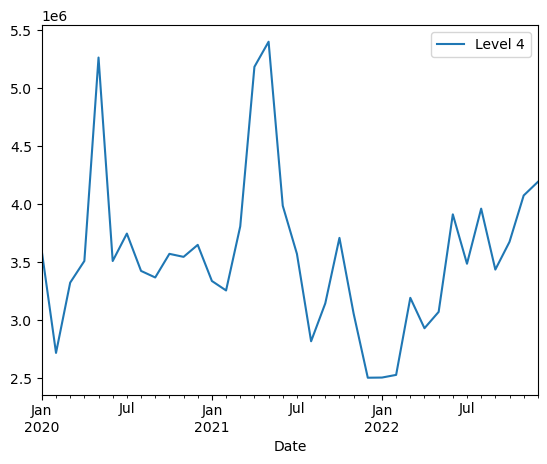

<Figure size 640x480 with 0 Axes>

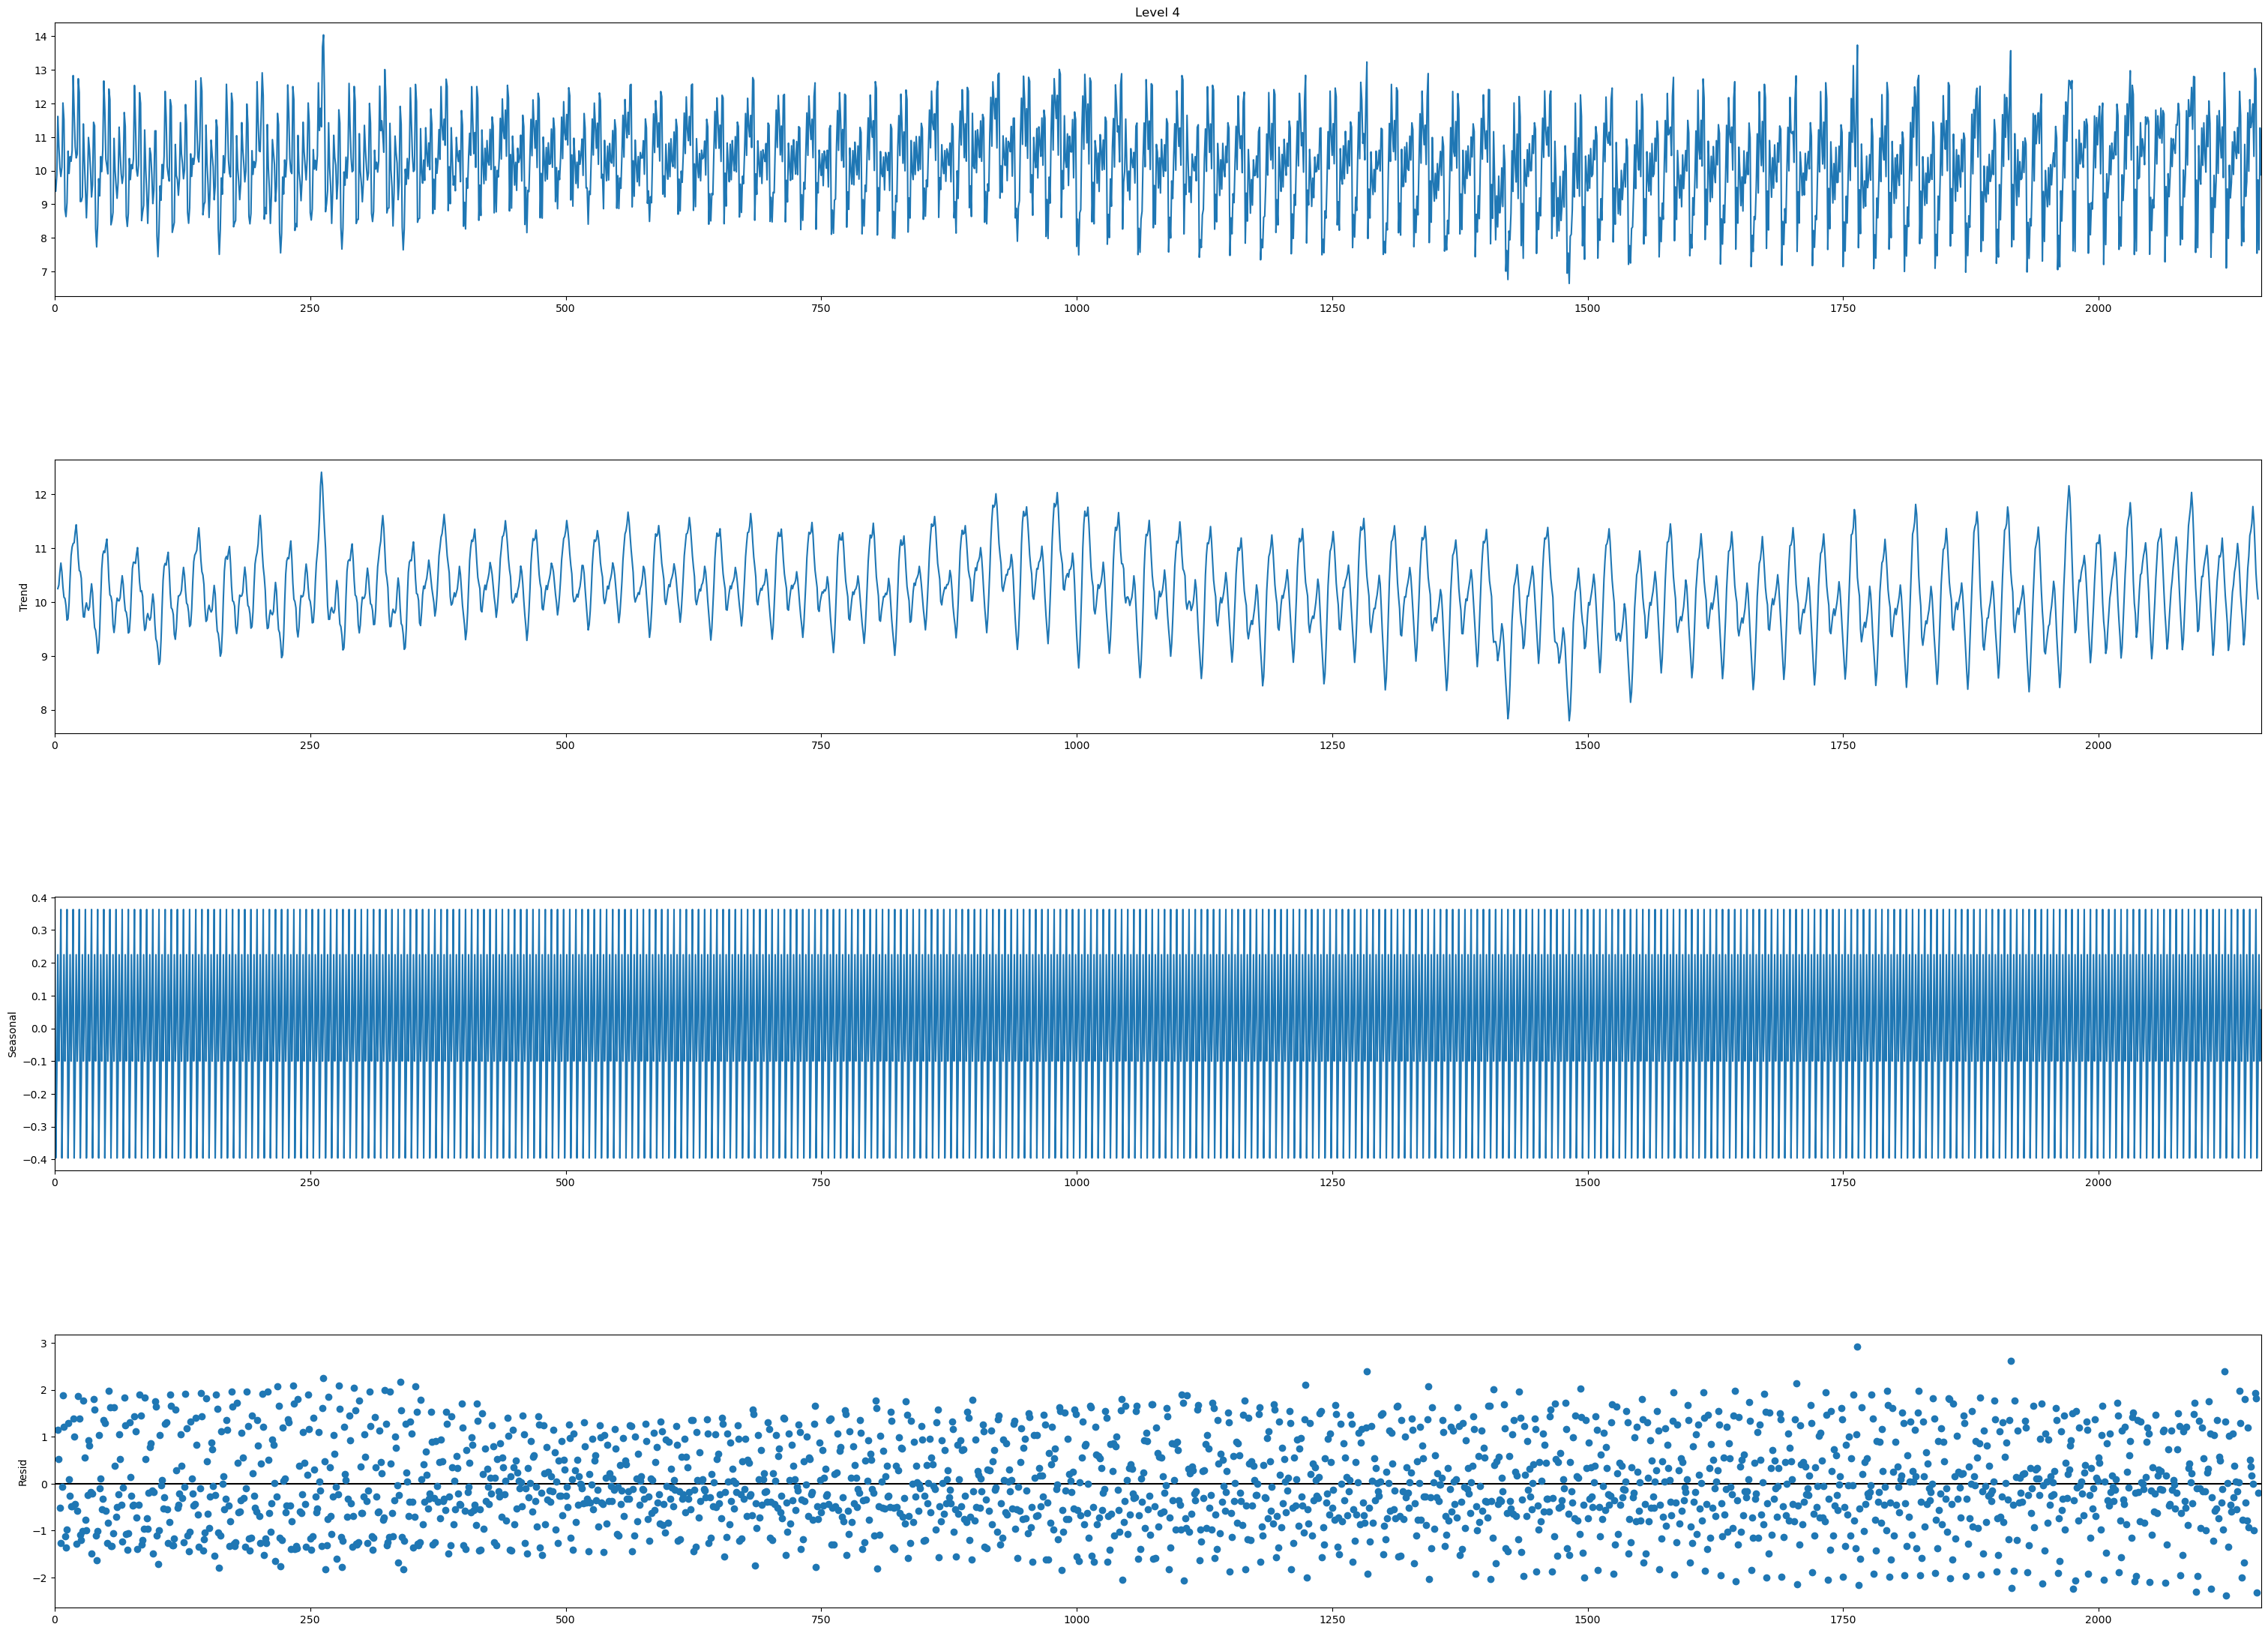

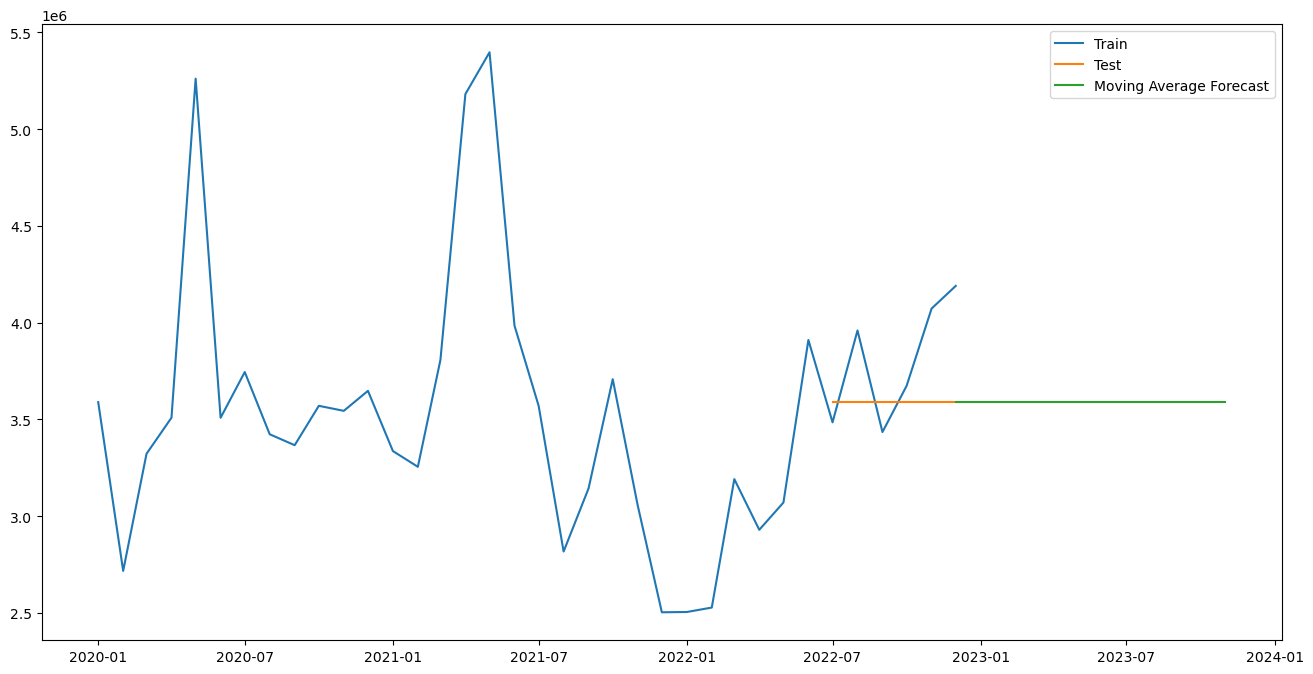

Mean Absolute Percentage Error:  0.07539240368184476
Root Mean Squared Error:  357558.1098795924
ARIMA(0, 0, 0)x[0, 0, 0, 13]13 - AIC1191.4271536020003
ARIMA(0, 0, 0)x[0, 0, 1, 13]13 - AIC1287.6808937762473
ARIMA(0, 0, 0)x[0, 1, 0, 13]13 - AIC706.67983763693
ARIMA(0, 0, 0)x[0, 1, 1, 13]13 - AIC704.5360345430838
ARIMA(0, 0, 0)x[1, 0, 0, 13]13 - AIC1134.2924510805942
ARIMA(0, 0, 0)x[1, 0, 1, 13]13 - AIC1144.6132242705391
ARIMA(0, 0, 0)x[1, 1, 0, 13]13 - AIC718.0331396781128
ARIMA(0, 0, 0)x[1, 1, 1, 13]13 - AIC706.2645913104298
ARIMA(0, 0, 1)x[0, 0, 0, 13]13 - AIC1171.109422054402
ARIMA(0, 0, 1)x[0, 0, 1, 13]13 - AIC1170.9912139940018
ARIMA(0, 0, 1)x[0, 1, 0, 13]13 - AIC703.2002464789216
ARIMA(0, 0, 1)x[0, 1, 1, 13]13 - AIC702.0330481474181
ARIMA(0, 0, 1)x[1, 0, 0, 13]13 - AIC1170.3045848657139
ARIMA(0, 0, 1)x[1, 0, 1, 13]13 - AIC1172.2503993491962
ARIMA(0, 0, 1)x[1, 1, 0, 13]13 - AIC702.2154995332869
ARIMA(0, 0, 1)x[1, 1, 1, 13]13 - AIC703.9506384802221
ARIMA(0, 1, 0)x[0, 0, 0, 13]13 - A

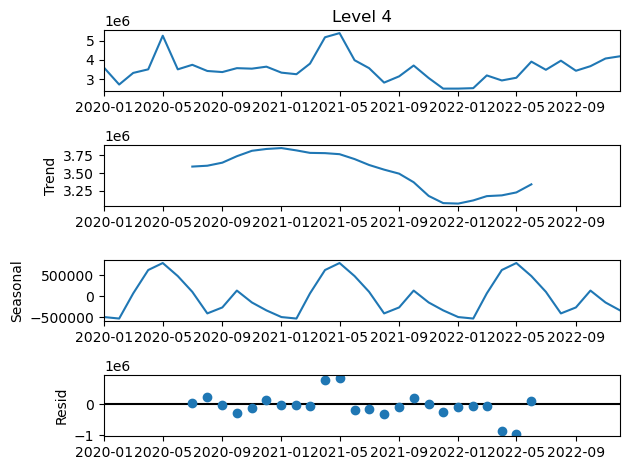

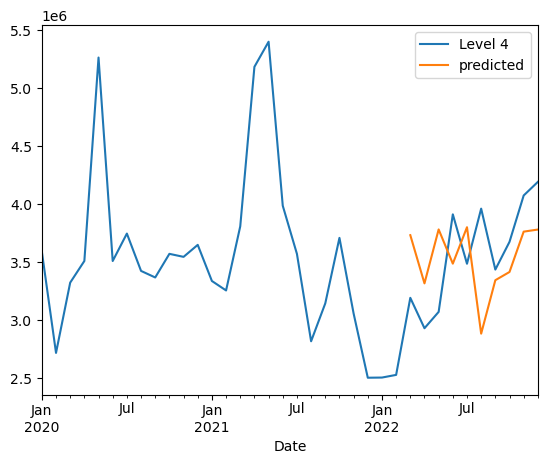

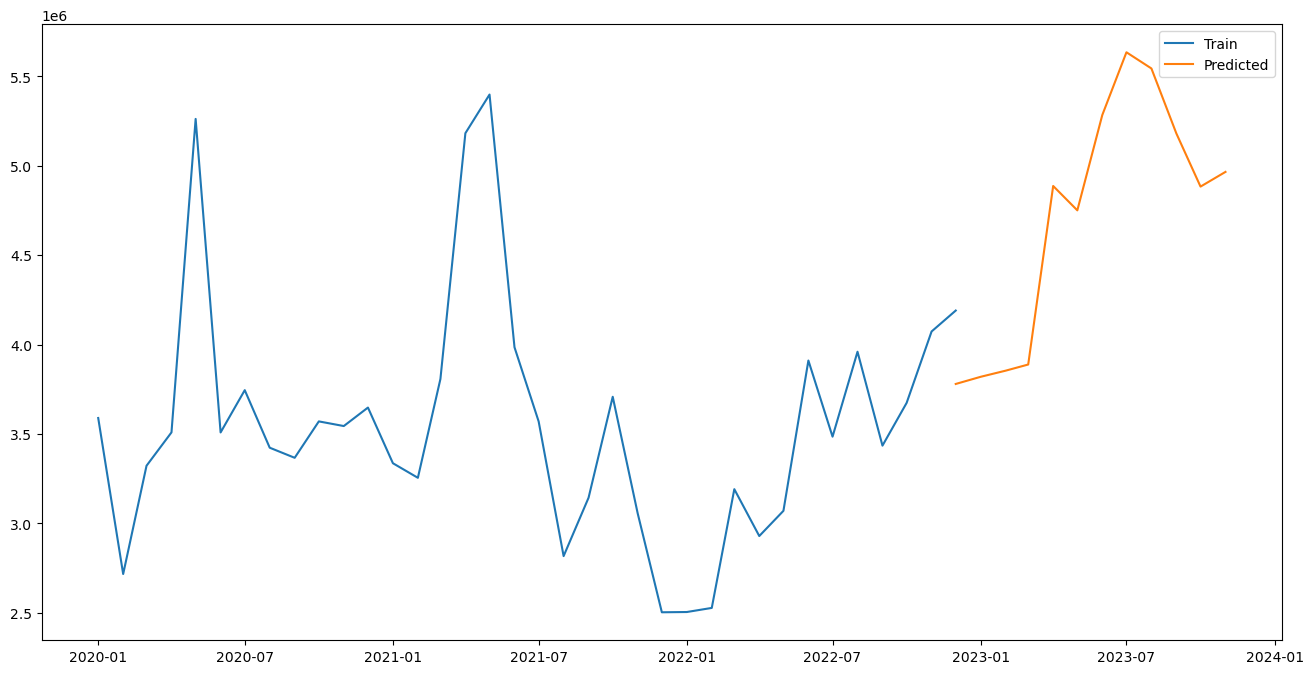

In [21]:
predict_future(dataframe,'Desktop_Website','Existing_Customer','From LinkedIn','Bengaluru')

## Part 5: Visualization

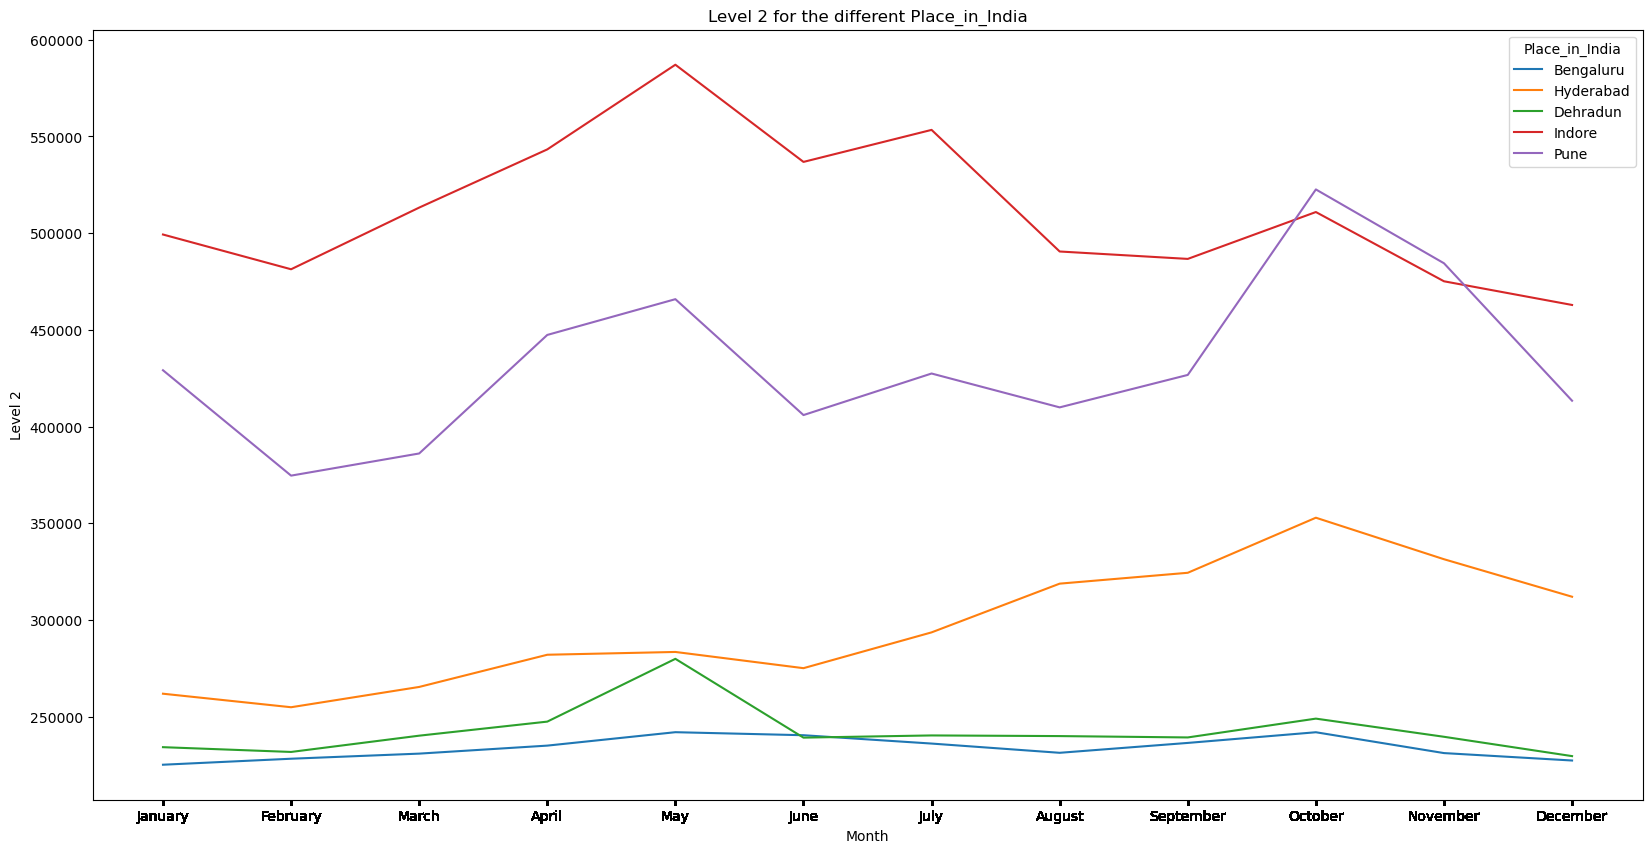

In [22]:
#line graph for “Level 2” for the different “Place_in_India” over the months of the year 2020 & 2021
data=df[(df["Year"]==2020) | (df["Year"] == 2021)]

plt.figure(figsize=(20,10))
a= sns.lineplot(data=data,x='Month',y='Level 2',hue='Place_in_India',ci=None)
a.set(xticks=data['Month'])
a.set(title="Level 2 for the different Place_in_India")
plt.show()

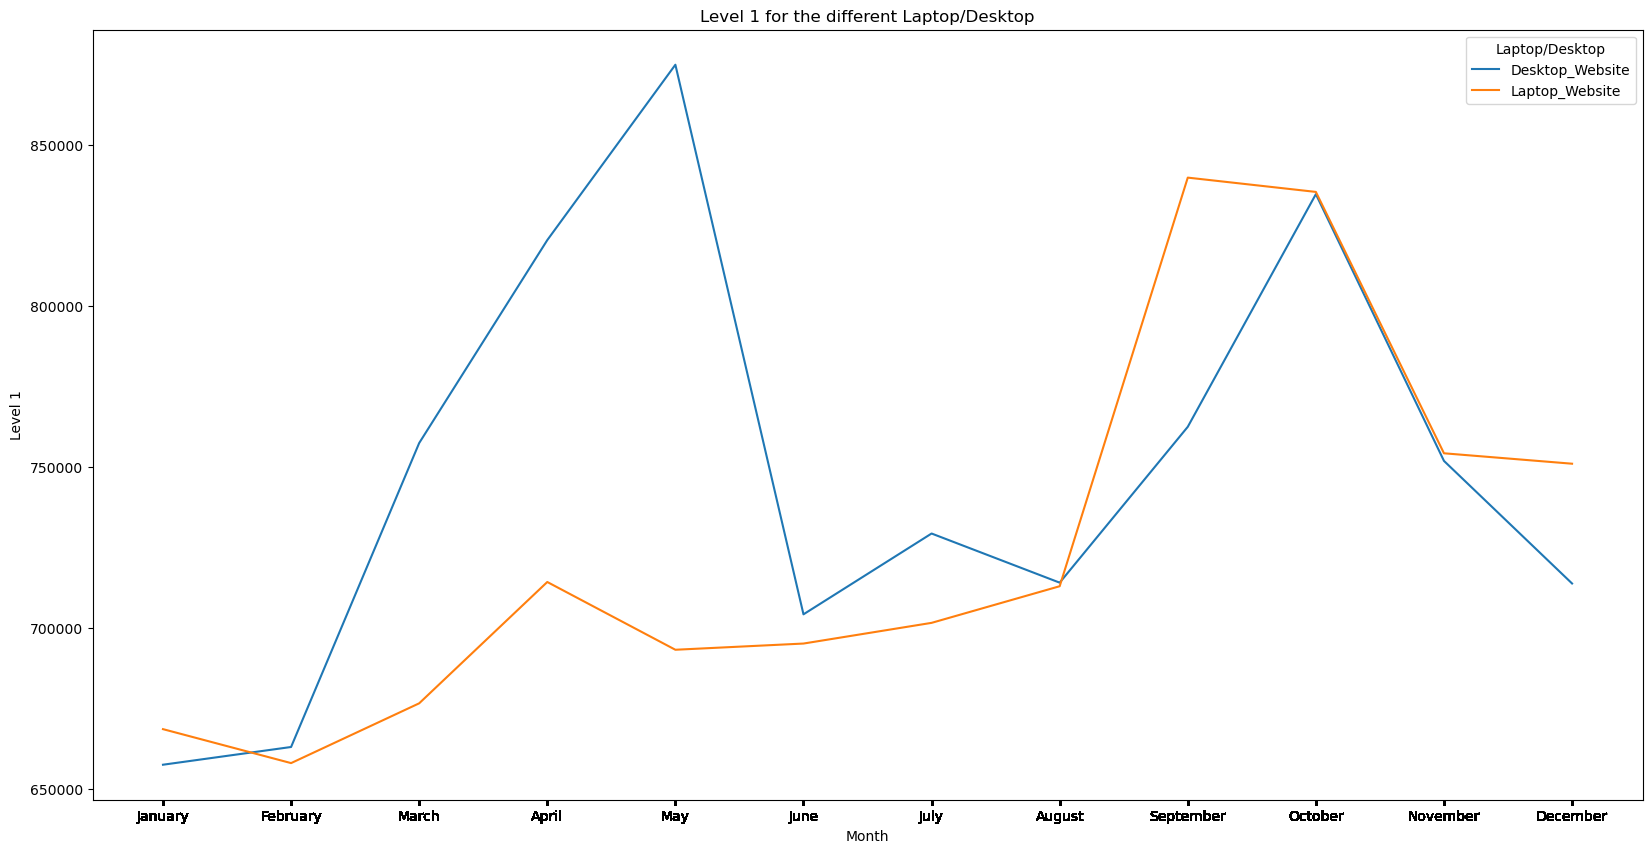

In [23]:
#line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2020 & 2021
data=df[(df["Year"]==2020) | (df["Year"] == 2021)]

plt.figure(figsize=(20,10))
a= sns.lineplot(data=data,x='Month',y='Level 1',hue='Laptop/Desktop',ci=None)
a.set(xticks=data['Month'])
a.set(title="Level 1 for the different Laptop/Desktop")
plt.show()

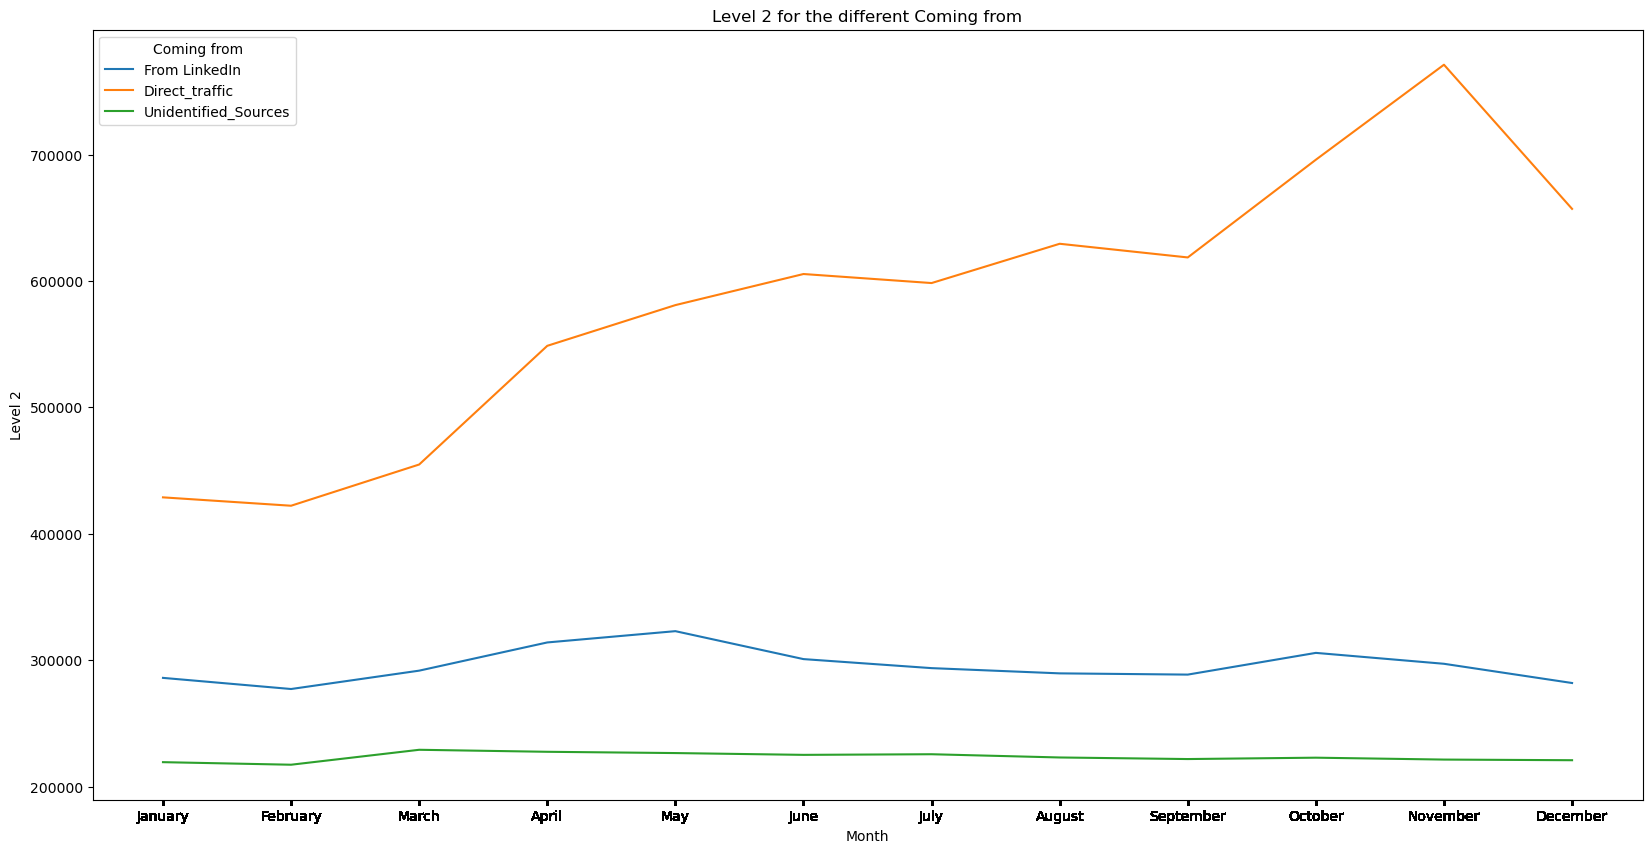

In [24]:
# line graph for “Level 2” for the different “Coming from” over the months of the year 2021 & 2022
data=df[(df["Year"]==2021) | (df["Year"] == 2022)]

plt.figure(figsize=(20,10))
a= sns.lineplot(data=data,x='Month',y='Level 2',hue='Coming from',ci=None)
a.set(xticks=data['Month'])
a.set(title="Level 2 for the different Coming from")
plt.show()

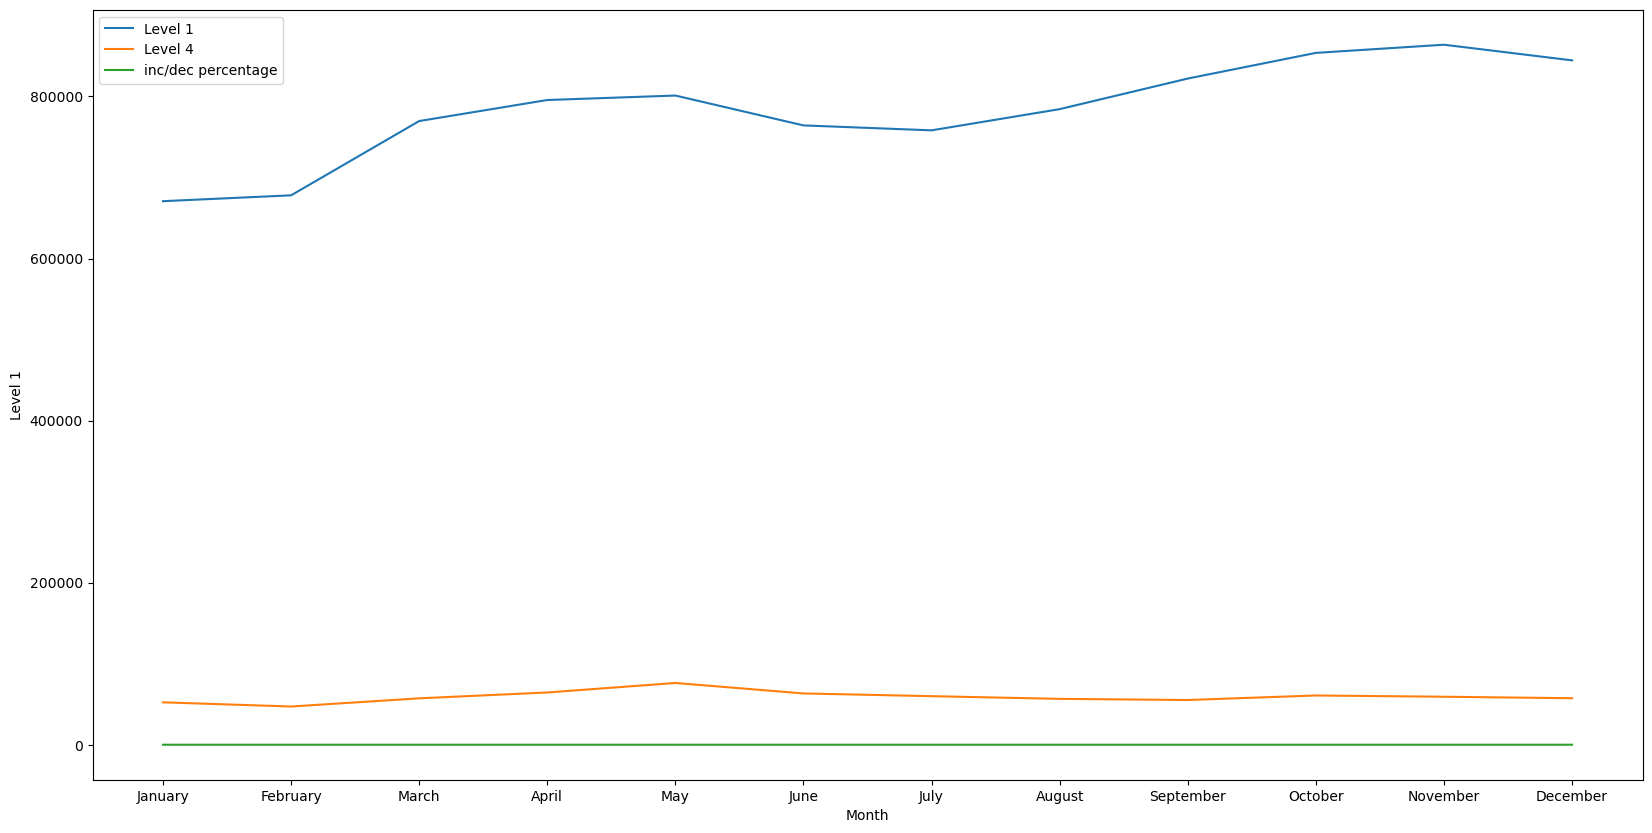

In [25]:
# line graph for “Level 1”, “Level 4”  and “inc/dec percentage” columns over the months of the year 2020, 2021 & 2022
data=df[(df["Year"]==2020) | (df["Year"] == 2021) | (df["Year"]==2022)]

plt.figure(figsize=(20,10))
sns.lineplot(x='Month', y='Level 1', ci=None,data=data)
sns.lineplot(x='Month', y='Level 4', ci=None,data=data)
sns.lineplot(x='Month', y='inc/dec percentage', ci=None,data=data)
plt.legend("best",labels=['Level 1', 'Level 4', 'inc/dec percentage'])
plt.show()

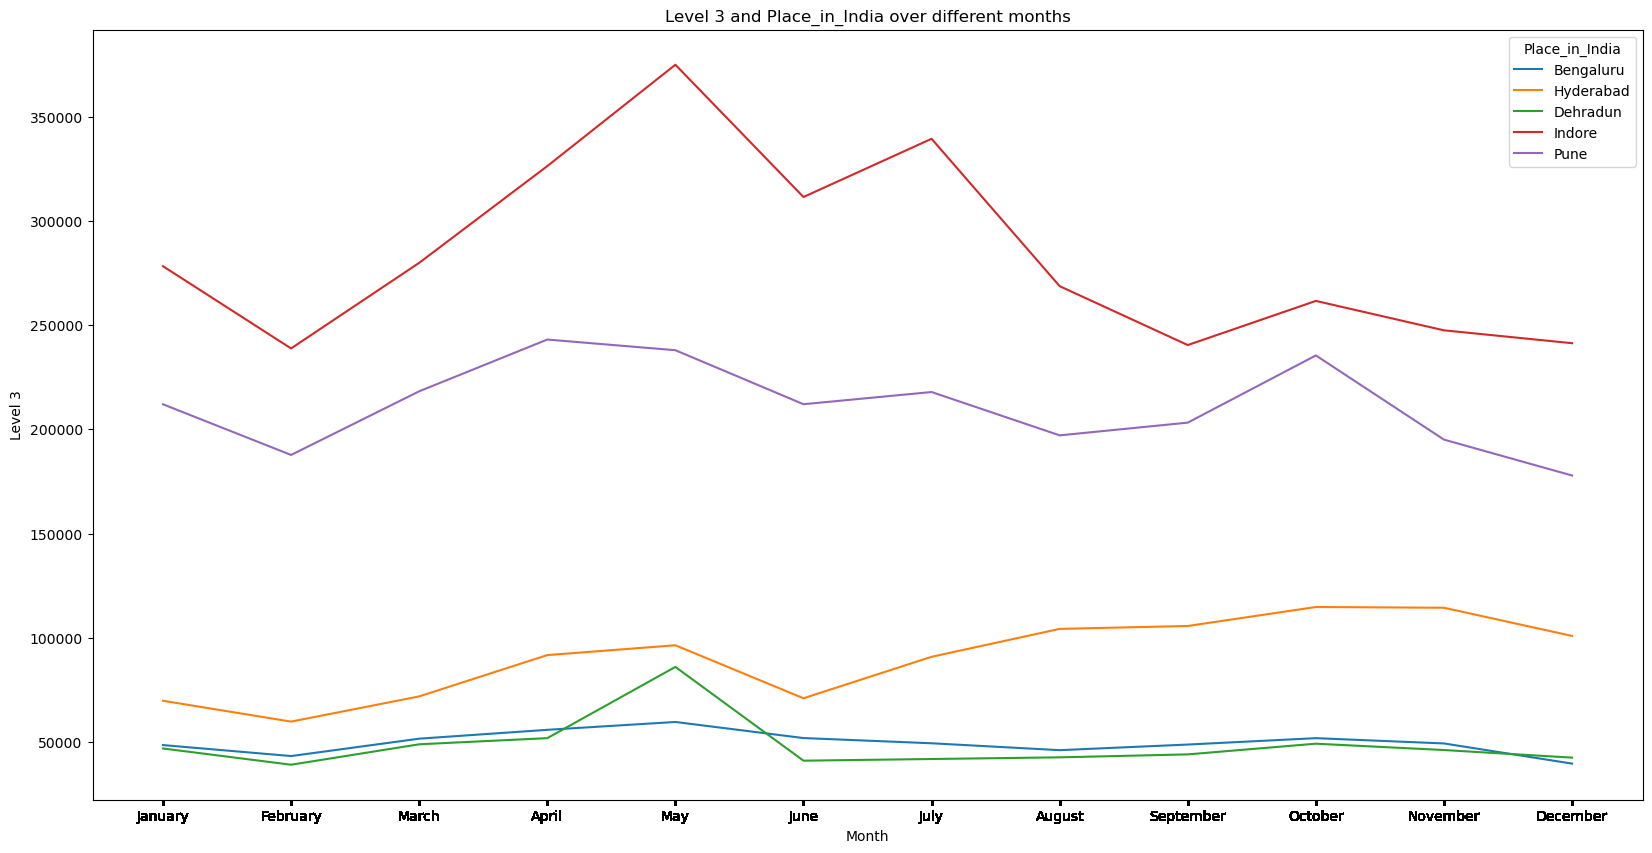

In [26]:
# line graph for “Level 3” and “Place_in_India” over the months of the year 2020 and 2021
data=df[(df["Year"]==2020) | (df["Year"] == 2021)]

plt.figure(figsize=(20,10))
a= sns.lineplot(data=data,x='Month',y='Level 3',hue='Place_in_India',ci=None)
a.set(xticks=data['Month'])
a.set(title="Level 3 and Place_in_India over different months")
plt.show()

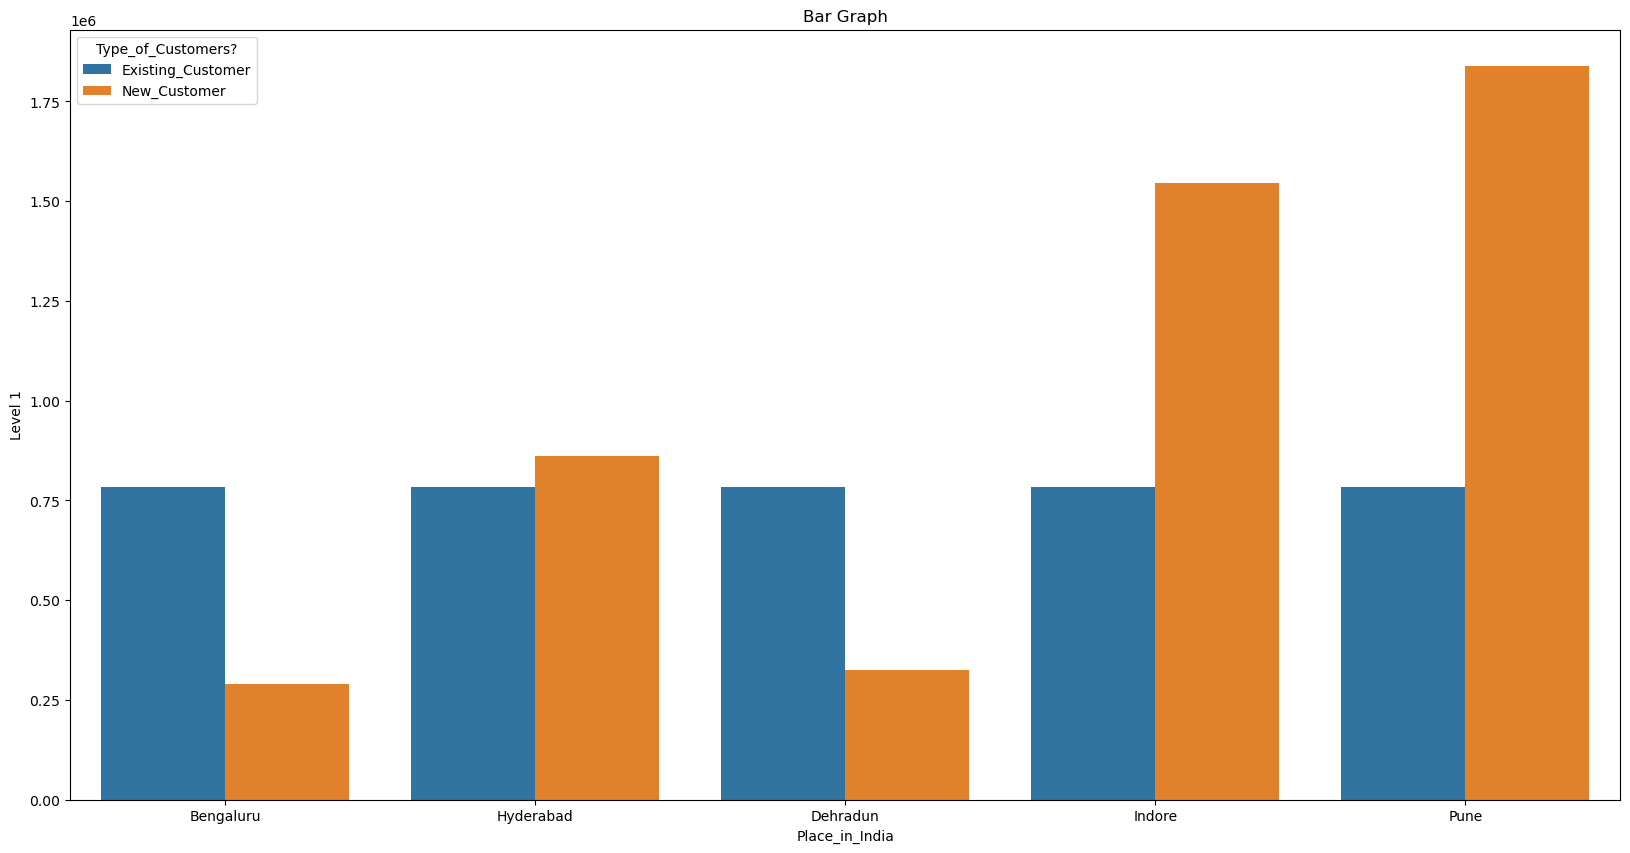

In [27]:
# bar graph showing the “Level 1” from various places in India and the type of customers for the year 2022
data=df[df["Year"]==2022]

plt.figure(figsize=(20,10))
a= sns.barplot(data=data,x='Place_in_India',y='Level 1',hue='Type_of_Customers?',ci=None)
a.set(title="Bar Graph")
plt.show()

**Insights derived from all the graphs above:**

1. Level 2 and Level 3 is highest for Indore over the months of the year 2020 & 2021.
2. Customers accessing the website/app have the highest Level 1 over the months of the year 2020 & 2021.
3. Direct Traffic is highest for Level 2 over the months of the year 2021 & 2022.
4. In the months of April, May and November, the level 1 and Level 2 scores increase.
5. Most of the New Customers has joined from Indore and Pune in the year 2022.

## Part 6: About the Previous projects

●	Please describe any interesting project you did in the Data Science domain in more than 250 words. Attach Github links if possible.

--->I have worked on many important projects personal and Internship projects in Data Science. What's really crucial for me when starting one is to get very clear on the goals right at the start and then create a plan with milestones. Some of them are:

**1. Adult Census Income Prediction (Machine Learning)**
    The problem statement was to predict whether a person has an income of more than 50K a year or not. This was a binary
    classification problem where a person was classified into the >50K group or <=50K group. The whole project was divided into
    three parts:
    
    1. Data Preparation : This consisted of storing our data into cassandra database and utilizing it for Data Cleaning, Feature Engineering, Feature Selection, EDA, etc.
    2. Model Development : In this step, we used the resultant data after the implementation of the previous step to cross validate our Machine Learning model and perform Hyperparameter optimization based on various performance metrics in order to make our model predict as accurate results as possible.
    3. Model Deployment : This step included creation of a front-end using Flask and Heroku to put our trained model into production.
    
    A full project report including the Wireframe and Architecture of the project was created to demonstrate the work. The
    model was evaluated on basis of F1 score.


**2. Face Emotion Recognition (Deep Learning)**
    The problem statement was to classify the emotion on a person's face into one of seven categories (angry, disgusted,
    fearful, happy, neutral, sad and surprised), using deep convolutional neural networks. The front end was created uing
    **OpenCV** and **Haarcascade Frontalface** was used to detect the faces and the emotion of the person was shown in real
    time.
    
    
**3. Movies Recommendation System (Natural Language Processing)**
    The purpose of this Content Based Movies Recommendation System project was to recommend movies similar to the movie user
    likes based on Cosine Similarlity metrics. This project was developed by collecting data from different sources like kaggle
    and web scraping and then combining and transforming the data into a common format to convert the features into vectors to
    apply Cosine Similarlity metrics. The details of the movies(title, genre, rating, poster, id etc) were fetched using an API
    by TMDB. **Flask** and **Bootstrap CSS** was used to build the front end and the model was deployed on Heroku to do real
    time Analysis.


**4. Superstore Sales Analysis (Exploratory Data Analysis)**
    This was project a data analytics project for the analysis of the Superstore sales dataset. A detailed **Exploratory Data
    Analysis (EDA)** of US Superstore to was performed to analyze distributions, find correlations and gain an understanding of
    the data. The Best-Selling and most Profitable category and sub-category was analyzed along with shipping mode and 
    customer segment to find the products which generate the most Profits and Sales. Also the data was analyzed to find out the
    weak areas to work on to make more profit.
    
You can find the project descriptions at the following links-

Adult Census Income Prediction-https://github.com/gurjeet29/Data_Science_Portfolio/tree/main/ML/Adult%20Census%20Income%20Prediction

Face Emotion Recognition-https://github.com/gurjeet29/Data_Science_Portfolio/tree/main/DL/Face%20Emotion%20Recognition

Movies Recommendation System-https://github.com/gurjeet29/Data_Science_Portfolio/tree/main/NLP/Movies%20Recommendation%20System

Superstore Sales Analysis-https://github.com/gurjeet29/Data_Science_Portfolio/tree/main/EDA/Superstore%20EDA


**Github Link: https://github.com/gurjeet29/Data_Science_Portfolio**

## Part 7: Time management

●	Can you please share your thoughts, in less than 120 words, on “If you get selected, how will you manage your time for this full-time internship opportunity”

---> If I get selected for this internship, time management will be one of the crucial aspects I will have to consider. I would start by analysing each task assigned to me and allocate time based on the task's difficulty. I do not have any experience with managing time in work yet, but I will have a proactive approach to everything I do.

# Thank You